# Data Exploration of the Steam Dataset

Please download the dataset at the following link and assign the csv path below:

https://www.gigasheet.com/sample-data/steam-game-reviews

## 1 - Setup

### 1.1 Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 1.2 Load Datasets

Steam Reviews dataset

In [2]:
reviews_path = '../data/Steam Game Reviews export 2025-09-03 01-50-49.csv' # Replace with the path to your reviews CSV File
game_metadata_path = '../data/games_description.csv' # Replace with path to game metadata CSV file


steamreviews = pd.read_csv(reviews_path)
gamemetadata = pd.read_csv(game_metadata_path)
steamreviews.head()


,review,hours_played,helpful,funny,recommendation,date,game_name,username
0,The game itself is also super fun. The PvP and...,39.9,1152,13,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Sentinowl\n224 products in account
1,Never cared much about Warhammer until this ga...,91.5,712,116,Recommended,13 September,"Warhammer 40,000: Space Marine 2",userpig\n248 products in account
2,A salute to all the fallen battle brothers who...,43.3,492,33,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Imparat0r\n112 products in account
3,this game feels like it was made in the mid 20...,16.8,661,15,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Fattest_falcon
4,Reminds me of something I've lost. A genuine g...,24.0,557,4,Recommended,12 September,"Warhammer 40,000: Space Marine 2",Jek\n410 products in account


In [3]:
gamemetadata.head()

,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...
1,Counter-Strike 2,"For over two decades, Counter-Strike has offer...",About This Game\n\t\t\t\t\t\t\tFor over two de...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","21 Aug, 2012",['Valve'],['Valve'],Very Positive,"(8,313,603)","2,258,990",https://store.steampowered.com/app/730/Counter...
2,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
3,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...",About This Game\nCyberpunk 2077 is an open-wor...,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"10 Dec, 2020",['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,"(680,264)","324,124",https://store.steampowered.com/app/1091500/Cyb...
4,ELDEN RING,THE CRITICALLY ACCLAIMED FANTASY ACTION RPG. R...,About This Game\nTHE CRITICALLY ACCLAIMED FANT...,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"25 Feb, 2022","['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,"(705,261)","491,741",https://store.steampowered.com/app/1245620/ELD...


### 1.3 Merge Datasets

In [75]:
steamdataset = pd.merge(steamreviews, gamemetadata, left_on='game_name', right_on='name', how='left')
steamdataset.drop(columns=['name'], inplace=True)
steamdataset

,review,hours_played,helpful,funny,recommendation,date,game_name,username,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,The game itself is also super fun. The PvP and...,39.9,1152,13,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Sentinowl\n224 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
1,Never cared much about Warhammer until this ga...,91.5,712,116,Recommended,13 September,"Warhammer 40,000: Space Marine 2",userpig\n248 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
2,A salute to all the fallen battle brothers who...,43.3,492,33,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Imparat0r\n112 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
3,this game feels like it was made in the mid 20...,16.8,661,15,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Fattest_falcon,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
4,Reminds me of something I've lost. A genuine g...,24.0,557,4,Recommended,12 September,"Warhammer 40,000: Space Marine 2",Jek\n410 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992148,2022 Early Access Review Loads of fun!Initiall...,4.2,1,0,Recommended,"August 4, 2022",Turbo Golf Racing,"Fatal Exit\n1,902 products in account",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
992149,2022 Early Access Review Great fun!,8.5,1,0,Recommended,"August 4, 2022",Turbo Golf Racing,cleybaR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
992150,2022 Early Access Review Excellent pick up and...,83.3,2,0,Recommended,"August 4, 2022",Turbo Golf Racing,Sim\n600 products in account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
992151,2022 Early Access Review This game is so much ...,3.8,1,0,Recommended,"August 4, 2022",Turbo Golf Racing,Fatboybadboy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
steamdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992153 entries, 0 to 992152
Data columns (total 20 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   review                                   991650 non-null  object 
 1   hours_played                             992153 non-null  float64
 2   helpful                                  992153 non-null  int64  
 3   funny                                    992153 non-null  int64  
 4   recommendation                           992153 non-null  object 
 5   date                                     992153 non-null  object 
 6   game_name                                992153 non-null  object 
 7   username                                 992072 non-null  object 
 8   short_description                        925244 non-null  object 
 9   long_description                         925244 non-null  object 
 10  genres                          

### 1.4 Clean up data

In [40]:
steamdataset[steamdataset['date'].isna()].game_name.value_counts()

game_name
Supermarket Simulator                                 5010
Palworld                                              5010
Manor Lords                                           5010
The First Descendant                                  5006
Fields of Mistria                                     5000
                                                      ... 
Shawarma Legend                                         30
Monster Energy Supercross - The Official Videogame      29
MXGP 2019 - The Official Motocross Videogame            20
69 Balls                                                19
MXGP - The Official Motocross Videogame                  4
Name: count, Length: 242, dtype: int64

Why are these missing values?? There are 14 games with missing values, we can fill them in later.

In [12]:
steamdataset[steamdataset['short_description'].isna()]['game_name'].unique()

array(['Raft', 'Stray', 'Dead Cells', "Don't Starve Together",
       'Ori and the Will of the Wisps', 'Life is Strange - Episode 1',
       'Human Fall Flat', "It Takes Two Friend's Pass", "Don't Starve",
       'It Takes Two', 'NieR:Automata™', 'PAYDAY 3', 'GUNDAM BREAKER 4',
       'Caves of Qud', 'Turbo Golf Racing'], dtype=object)

In [13]:
steamdataset[steamdataset['release_date'].isna()]['game_name'].unique()

array(['Raft', 'Stray', 'Dead Cells', "Don't Starve Together",
       'Ori and the Will of the Wisps', 'Life is Strange - Episode 1',
       'Human Fall Flat', "It Takes Two Friend's Pass", "Don't Starve",
       'It Takes Two', 'NieR:Automata™', 'PAYDAY 3', 'GUNDAM BREAKER 4',
       'Caves of Qud', 'Turbo Golf Racing'], dtype=object)

In [14]:
steamdataset[steamdataset['link'].isna()]['game_name'].unique()

array(['Raft', 'Stray', 'Dead Cells', "Don't Starve Together",
       'Ori and the Will of the Wisps', 'Life is Strange - Episode 1',
       'Human Fall Flat', "It Takes Two Friend's Pass", "Don't Starve",
       'It Takes Two', 'NieR:Automata™', 'PAYDAY 3', 'GUNDAM BREAKER 4',
       'Caves of Qud', 'Turbo Golf Racing'], dtype=object)

In [15]:
# TODO FILL IN MISSING METADATA, CAN BE DONE MANUALLY AT https://steamdb.info/ SEARCH FOR EACH GAME AND FILL IN

## Data Exploration

Let's look at the data and what we can work with for now.

TODO - username is a little messed up or missing for some of them, a few NaN values game descriptions, perhaps they weren't included in the secondary dataset, 11 games can be filled in manually. Can check some stuff with these 

In [57]:
steamdataset.release_date = pd.to_datetime(steamdataset['release_date'], errors='coerce')

In [61]:
steamdataset.release_date

0        2024-09-09
1        2024-09-09
2        2024-09-09
3        2024-09-09
4        2024-09-09
            ...    
992148          NaT
992149          NaT
992150          NaT
992151          NaT
992152          NaT
Name: release_date, Length: 991650, dtype: datetime64[ns]

TODO - When removing nans, we lose all these games, we need to fill in the correct review year for all the data.

In [44]:
diff = list(set(steamdataset['game_name']) - set(steamdsnonan['game_name']))
diff

['Dead Rising Deluxe Remaster',
 'LOCKDOWN Protocol',
 'EA SPORTS FC™ 25',
 'Crime Scene Cleaner',
 'Dark and Darker',
 'EA SPORTS™ Madden NFL 25',
 'Chained Together',
 'GUNDAM BREAKER 4',
 'Fields of Mistria',
 'F1® 24',
 'UFO 50',
 'WWE 2K24',
 'Age of Mythology: Retold',
 'Once Human',
 'Palworld',
 'Warhammer 40,000: Space Marine 2',
 'Shawarma Legend',
 'Visions of Mana',
 'Rooftops & Alleys: The Parkour Game',
 'TCG Card Shop Simulator',
 "Dragon's Dogma 2",
 'Balatro',
 'shapez 2',
 'Dale & Dawson Stationery Supplies',
 'Train Sim World® 5',
 'The Crew Motorfest',
 'The First Descendant',
 'Black Myth: Wukong',
 'F1® Manager 2024',
 'Sins of a Solar Empire II',
 'CarX Street',
 'NBA 2K25',
 'Manor Lords',
 'Supermarket Simulator',
 'Motordoom',
 'Ale & Tale Tavern',
 'Summoners War']

Note large dip in 2024 Could be an indication of where missing review information is coming from. Check reviews that have NaT to steam review dates. See if there is an issue there,

<Axes: title={'center': 'Number of Steam Reviews Over Time'}, xlabel='Year', ylabel='Number of Reviews'>

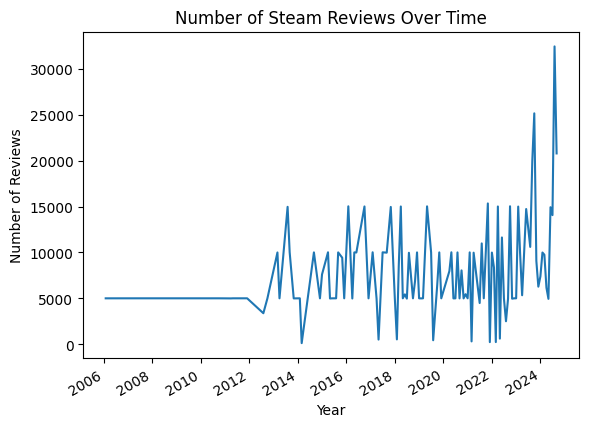

In [89]:
monthly_counts = steamdataset.groupby(steamdataset['release_date'].dt.to_period('M')).size()
monthly_counts.index = monthly_counts.index.to_timestamp()
monthly_counts.plot(kind='line', title='Number of Steam Reviews Over Time', xlabel='Year', ylabel='Number of Reviews')

Notable lack of review data from the year >2024, missing review date games all released in 2024 as well.

/var/folders/h6/nnzy69c13sn43ypbbpk2877m0000gn/T/ipykernel_77244/1279311225.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  monthly_counts = steamdsnonan.resample('Y', on='date').size()


<Axes: xlabel='date'>

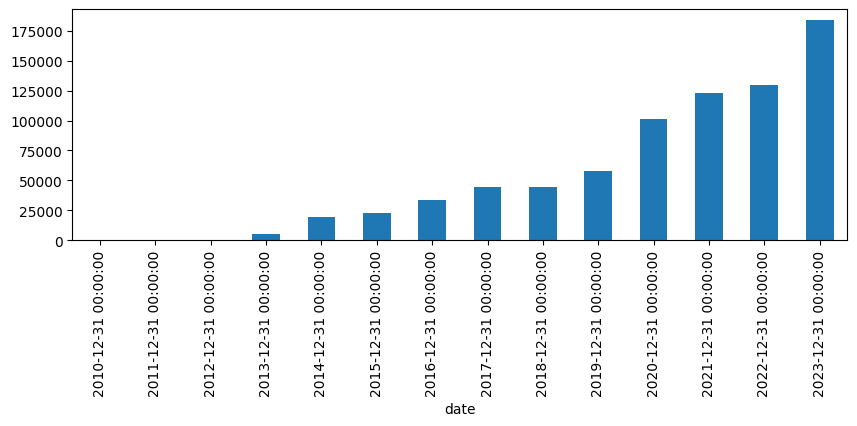

In [83]:
monthly_counts = steamdsnonan.resample('Y', on='date').size()
monthly_counts.plot(kind='bar', figsize=(10, 3))

No games release in 2024

In [87]:
steamdataset.groupby(steamdataset['release_date'].dt.year).game_name.nunique()

release_date
2006.0     2
2007.0     1
2009.0     2
2010.0     2
2011.0     3
2012.0     2
2013.0     9
2014.0     5
2015.0    12
2016.0    12
2017.0    13
2018.0    22
2019.0    14
2020.0    14
2021.0    19
2022.0    20
2023.0    32
2024.0    41
Name: game_name, dtype: int64

## B. Transformations

### Missing Data Fixing

In [76]:
# A few dates are missing the year, highly likely that the missing year is 2024. When collecting data, Steam shows recent reviews WITHOUT the year.
def fixDates(date): 
    try:
        parts = date.split(' ')
        if len(parts) == 3:  
            # Already in format like "September 12, 2020"
            return date
        elif len(parts) == 2:
            # Format "12 September" → reorder → "September 12, 2024"
            if parts[0].isnumeric():
                day, month = parts
            else:
                month, day = parts
            fixed = f"{month} {day}, 2024"
            return fixed
        else:
            return pd.NA
    except Exception:
        return pd.NA

#### Series.map + data fixing

In [80]:
# Removing empty reviews, no text in the review column means no review information to analyize
steamdataset = steamdataset.dropna(subset=['review']).copy() # Need to use copy to avoid SettingWithCopyWarning
steamdataset['date'] = steamdataset['date'].map(fixDates)
steamdataset['date'] = pd.to_datetime(steamdataset['date'], errors='coerce')
steamdataset

,review,hours_played,helpful,funny,recommendation,date,game_name,username,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,The game itself is also super fun. The PvP and...,39.9,1152,13,Recommended,2024-09-14,"Warhammer 40,000: Space Marine 2",Sentinowl\n224 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
1,Never cared much about Warhammer until this ga...,91.5,712,116,Recommended,2024-09-13,"Warhammer 40,000: Space Marine 2",userpig\n248 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
2,A salute to all the fallen battle brothers who...,43.3,492,33,Recommended,2024-09-14,"Warhammer 40,000: Space Marine 2",Imparat0r\n112 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
3,this game feels like it was made in the mid 20...,16.8,661,15,Recommended,2024-09-14,"Warhammer 40,000: Space Marine 2",Fattest_falcon,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
4,Reminds me of something I've lost. A genuine g...,24.0,557,4,Recommended,2024-09-12,"Warhammer 40,000: Space Marine 2",Jek\n410 products in account,Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992148,2022 Early Access Review Loads of fun!Initiall...,4.2,1,0,Recommended,2022-08-04,Turbo Golf Racing,"Fatal Exit\n1,902 products in account",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
992149,2022 Early Access Review Great fun!,8.5,1,0,Recommended,2022-08-04,Turbo Golf Racing,cleybaR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
992150,2022 Early Access Review Excellent pick up and...,83.3,2,0,Recommended,2022-08-04,Turbo Golf Racing,Sim\n600 products in account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
992151,2022 Early Access Review This game is so much ...,3.8,1,0,Recommended,2022-08-04,Turbo Golf Racing,Fatboybadboy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
steamdataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991650 entries, 0 to 992152
Data columns (total 20 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   review                                   991650 non-null  object        
 1   hours_played                             991650 non-null  float64       
 2   helpful                                  991650 non-null  int64         
 3   funny                                    991650 non-null  int64         
 4   recommendation                           991650 non-null  object        
 5   date                                     989875 non-null  datetime64[ns]
 6   game_name                                991650 non-null  object        
 7   username                                 991569 non-null  object        
 8   short_description                        924758 non-null  object        
 9   long_description               

In [ ]:
# TODO We can possibly use the hours played or funny or helpful votes to create categorial columns, like oh this has more than some number of hours played, this is a player who played a lot of this game, or this is a funny review, etc.

In [ ]:
# TODO can use map or apply to fix usernames with some function fixUsernames. 

In [ ]:
# TODO A few group by options. By release or review year, game name, recommended, any new categorical columns made, overall rating... 

In [ ]:
# TODO Properly organize the notebook with markdowns like explained in the slides, like A. Data Card, B. Transformations, 